<a href="https://colab.research.google.com/github/seohyeon-lee-2025/data-science-study-notes/blob/main/tidy_tuesday_0117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("tidy0117.csv")
df.shape
df.columns

Index(['artist_name', 'edition_number', 'year', 'artist_nationality',
       'artist_nationality_other', 'artist_gender', 'artist_race',
       'artist_ethnicity', 'book', 'space_ratio_per_page_total',
       'artist_unique_id', 'moma_count_to_year', 'whitney_count_to_year',
       'artist_race_nwi'],
      dtype='object')

In [ ]:
#percentage of white men featured every year
#calculate % male first. break down by race. 
#alternatively calculate % white first. break down by gender. 
#the first approach seems better because we can infer % female from the result. 

#% of male artists from all yrs
male_num = df.loc[df['artist_gender']=="Male"]['artist_name'].count()
male_num
tot_num = df['artist_name'].count()
percent_male = male_num/tot_num
percent_male

0.8734977862112587

In [ ]:
#% of white artists from all yrs
white_num = df.loc[df['artist_race']=="White"]['artist_name'].count()
percent_white = white_num/tot_num
percent_white

0.9285262492093611

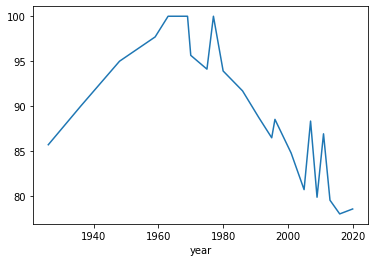

In [ ]:
male_count = df.loc[df['artist_gender']=="Male"].groupby(["year"])['year'].count()
artists_num_yr = df.groupby(['year'])['year'].count()

male_percent_yr = 100*male_count/artists_num_yr
male_percent_yr.plot()

In [ ]:
race = df.groupby(['artist_gender', 'artist_race'])['year'].count()

#wanted to break data down per year

artist_gender  artist_race                              
Female         American Indian or Alaska Native                2
               Asian                                           4
               Black or African American                      11
               Native Hawaiian or Other Pacific Islander       7
               White                                         314
Male           American Indian or Alaska Native                2
               Asian                                          62
               Black or African American                      72
               Native Hawaiian or Other Pacific Islander       5
               White                                        2621
Name: year, dtype: int64

<Figure size 1440x1440 with 0 Axes>

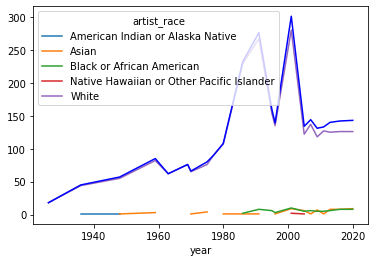

<Figure size 1440x1440 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
race_split = df.loc[df['artist_gender']=="Male"].groupby(['year', 'artist_race'])['year'].count()
plt_x = race_split.unstack().index.tolist()

fig, ax = plt.subplots()
race_yr = race_split.unstack().plot(ax=ax)
male_yr = male_count.plot(ax=ax, color = "blue")

yr_index = race_split.index.map(lambda item: item[0]).tolist()
#plt.fill_between(yr_index, race_yr)
plt.figure(figsize = (20, 20))

Int64Index([1926, 1936, 1948, 1959, 1963, 1969, 1970, 1975, 1977, 1980, 1986,
            1991, 1995, 1996, 2001, 2005, 2007, 2009, 2011, 2013, 2016, 2020],
           dtype='int64', name='year')